In [1]:
!pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB 131.3 kB/s eta 0:00:09
   - -------------------------------------- 0.0/1.2 MB 217.9 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.2 MB 217.9 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.2 MB 217.9 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.2 MB 327.7 kB/s eta 0:00:04
   ------- -------------------------------- 0.2/1.2 MB 593.2 kB/s eta 0:00:02
   -------- ------------------------------- 0.2/1.2 MB 627.5 kB/s eta 0:00:02
   -------- ------------------------------- 0.2/1.2 MB 627.5 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.2 MB 610.3 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.2 MB 595.3 kB/s eta 0:00:02
   ----------

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\gavri\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\psycopg2\\_psycopg.cp311-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\gavri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import psycopg2
from psycopg2 import Error

In [ ]:
try:
    # Establish connection using psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    
    # Important for COPY and batch inserts within transactions
    cursor = connection.cursor()

    print("Информация о сервере PostgreSQL:")
    print(connection.get_dsn_parameters(), "\n")
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print(f"Вы подключены к: {record[0]}\n")



except (Exception, Error) as error:
    print(f"Ошибка при подключении: {error}")

finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение закрыто")


Connecting to PostgreSQL database using psycopg2...
Информация о сервере PostgreSQL:
{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'pr_07', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

Вы подключены к: PostgreSQL 17.3 on x86_64-windows, compiled by msvc-19.42.34436, 64-bit

Соединение закрыто


In [ ]:
try:
    # Подключение к базе данных с помощью psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    

    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Hospital (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Hospital_Name VARCHAR(100) NOT NULL,
        Bed_Count serial
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital' успешно создана")

    # Вставка данных в таблицу Hospital
    insert_query = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Bed_Count)
    VALUES
    (1, 'Mayo Clinic', 200),
    (2, 'Cleveland Clinic', 400),
    (3, 'Johns Hopkins', 1000),
    (4, 'UCLA Medical Center', 1500);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)


# Закрытие подключения к базе данных
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение закрыто")

Connecting to PostgreSQL database using psycopg2...
Таблица 'Hospital' успешно создана
Данные успешно вставлены в таблицу 'Hospital'
Соединение закрыто


In [15]:
try:
    # Подключение к базе данных с помощью psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    

    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Doctor (
    Doctor_Id serial NOT NULL PRIMARY KEY,
    Doctor_Name VARCHAR (100) NOT NULL,
    Hospital_Id serial NOT NULL,
    Joining_Date DATE NOT NULL,
    Speciality VARCHAR (100) NOT NULL,
    Salary INTEGER NOT NULL,
    Experience SMALLINT
    );'''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица успешно создана")

    # Вставка данных в таблицу Doctor
    insert_query = '''
    INSERT INTO Doctor (Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience)
    VALUES
    ('101', 'David', '1', '2005-02-10', 'Pediatric', 40000, NULL),
    ('102', 'Michael', '1', '2018-07-23', 'Oncologist', 20000, NULL),
    ('103', 'Susan', '2', '2016-05-19', 'Garnacologist', 25000, NULL),
    ('104', 'Robert', '2', '2017-12-28', 'Pediatric', 28000, NULL),
    ('105', 'Linda', '3', '2004-06-04', 'Garnacologist', 42000, NULL),
    ('106', 'William', '3', '2012-09-11', 'Dermatologist', 30000, NULL),
    ('107', 'Richard', '4', '2014-08-21', 'Garnacologist', 32000, NULL),
    ('108', 'Karen', '4', '2011-10-17', 'Radiologist', 30000, NULL),
    ('109', 'James', '1', '2022-01-15', 'Cardiologist', 45000, 5),
    ('110', 'Emily', '1', '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
    ('111', 'Olivia', '2', '2021-09-05', 'Neurologist', 42000, 4),
    ('112', 'John', '2', '2024-02-18', 'Surgeon', 60000, 2),
    ('113', 'Sophia', '3', '2022-07-30', 'Urologist', 38000, 6),
    ('114', 'Daniel', '3', '2025-03-22', 'Pulmonologist', 47000, 1),
    ('115', 'Isabella', '4', '2023-11-01', 'Pediatrician', 41000, 3),
    ('116', 'Liam', '4', '2022-05-25', 'Dermatologist', 35000, 4),
    ('117', 'Mia', '1', '2024-06-17', 'Gastroenterologist', 53000, 2),
    ('118', 'Lucas', '2', '2023-01-12', 'Anesthesiologist', 46000, 3);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Doctor'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)


# Закрытие подключения к базе данных
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение закрыто")

Connecting to PostgreSQL database using psycopg2...
Таблица успешно создана
Данные успешно вставлены в таблицу 'Doctor'
Соединение закрыто


In [11]:
#Задание 1. Создайте таблицу "appointments" с полями "ID", "DOCTOR_ID", "DATE".
try:
    # Подключение к базе данных с помощью psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    
    cursor = connection.cursor()

    #Запрос для создания таблицы
    create_table_query = '''CREATE TABLE appointments 
                (ID INT PRIMARY KEY NOT NULL,
                DOCTOR_ID      INT  NOT NULL,
                DATE           DATE);'''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица успешно создана в PostgreSQL")

except (Exception, Error) as error:
    print(f"Ошибка при подключении: {error}")

finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение закрыто")

Connecting to PostgreSQL database using psycopg2...
Таблица успешно создана в PostgreSQL
Соединение закрыто


In [19]:
#Задание 2. Выполните SQL-запрос для обновления зарплаты врача с ID=105.
try:
    # Подключение к базе данных с помощью psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    

    cursor = connection.cursor()

    #Обновление зарплаты доктора с ID=105
    update_salary_query = '''UPDATE doctor
    SET salary = 50000
    WHERE doctor_id = 105;
    '''
    cursor.execute(update_salary_query)
    connection.commit()
    print("Зарплата у ID=105 успешно изменена")


except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)


# Закрытие подключения к базе данных
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение закрыто")

Connecting to PostgreSQL database using psycopg2...
Зарплата у ID=105 успешно изменена
Соединение закрыто


In [ ]:
#Задание 3. Получите все записи о больнице с ID=3.	
#Функция подключения
def get_connection(database_name):
    
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection
        
#Функция закрытия подключения
def close_connection():
    if connection:
        connection.close()
        print("Соединение закрыто")

database_name = 'pr_07'
#Функция по поиску записей о больнице с id=3
def hospital_num3():
    try:
        connection = get_connection(database_name)
        cursor = connection.cursor()

        #sql-запрос по поиску записей 
        sql_select = ''' SELECT * from hospital WHERE hospital_id = 3
        '''
        cursor.execute(sql_select)
        records = cursor.fetchall()
        print(f"Записи о больнице с ID=3:")

        for row in records:
            print(f"Идентификатор больницы: {row[0]}")
            print(f"Наименование: {row[1]}")
            print(f"Количество мест: {row[2]}")


    except (Exception, psycopg2.Error) as error:
        print("Ошибка при подключении или работе с PostgreSQL:", error)

#Вывод результата и закрытие соединения
hospital_num3()
close_connection()
         

    

Connecting to PostgreSQL database using psycopg2...
Записи о больнице с ID=3:
Идентификатор больницы: 3
Наименование: Johns Hopkins
Количество мест: 1000
Соединение закрыто


In [ ]:
#Обновите стаж врача с ID=106.
try:
    # Подключение к базе данных с помощью psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    

    cursor = connection.cursor()

    #Обновление зарплаты доктора с ID=105
    update_salary_query = '''UPDATE doctor
    SET experience = 4
    WHERE doctor_id = 106;
    '''
    cursor.execute(update_salary_query)
    connection.commit()
    print("Стаж у ID=106 успешно изменен")


except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)


# Закрытие подключения к базе данных
finally:
    if connection:
        cursor.close()
        connection.close()
        print("Соединение закрыто")

Connecting to PostgreSQL database using psycopg2...
Стаж у ID=106 успешно изменен
Соединение закрыто


Connecting to PostgreSQL database using psycopg2...


C:\Users\gavri\AppData\Local\Temp\ipykernel_19840\4007366697.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(select_query, connection)


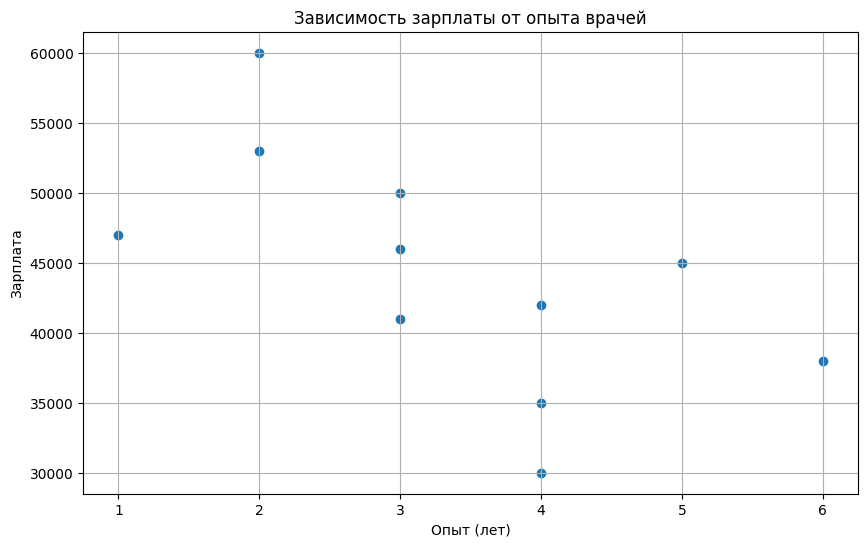

Соединение закрыто


In [ ]:
#Задание 5. Постройте график зависимости зарплаты от опыта врачей.
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

#Функция закрытия соединения
def close_connection():
    if connection:
        connection.close()
        print("Соединение закрыто")
# Подключение к PostgreSQL
try:
    # Подключение к базе данных с помощью psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user="postgres",
                                  password="gvi20052005",
                                  host="localhost",
                                  port="5432",
                                  database="pr_07")
    

    cursor = connection.cursor()

    # SQL-запрос для извлечения данных
    select_query = """
    SELECT Salary, Experience
    FROM Doctor
    WHERE Experience IS NOT NULL;
    """
    cursor.execute(select_query)
    connection.commit()
    # Загрузка данных в DataFrame
    df = pd.read_sql(select_query, connection)

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)


# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df['experience'], df['salary'], alpha=1)
plt.title('Зависимость зарплаты от опыта врачей')
plt.xlabel('Опыт (лет)')
plt.ylabel('Зарплата')
plt.grid(True)
plt.show()

close_connection()